In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
import community as community_louvain
from community.community_louvain import modularity
import statistics
import matplotlib.colors as mcolors

# Lecture des données

In [29]:
def init_data_within():
    G = nx.Graph()
    with open('scc2034_kilifi_all_contacts_within_households.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',', skipinitialspace=True)
        next(plots, None)  # on passe la première ligne (le header)
        house = {}
        for row in plots:
            house.setdefault(row[0], set())
            house[row[0]].add(row[1])
            house[row[0]].add(row[3])
            G.add_node(row[1])
            G.add_node(row[3])
            if G.has_edge(row[1],row[3]):
                G[row[1]][row[3]]['weight'] += int(row[8])
            else:
                G.add_edge(row[1], row[3],weight=int(row[8]))
                
        '''        
        r = {}
        for h in house:
            for e in house[h]:
                if e == '46':
                    r[h] = house[h]
                    break
        print(r)
        '''
    return G

def init_data_facebook_combined():
    G = nx.Graph()
    with open('facebook_combined.txt','r') as txtfile:
        plots = csv.reader(txtfile, delimiter = ' ')
        for row in plots:
            if G.has_edge(row[0],row[1]):
                G[row[0]][row[1]]['weight'] += 1
            else:
                G.add_edge(row[0], row[1],weight=1)
    return G

def init_data_accross():
    G = nx.Graph()
    with open('scc2034_kilifi_all_contacts_across_households.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',', skipinitialspace=True)
        next(plots, None)  # on passe la première ligne (le header)
        for row in plots:
            G.add_node(row[1])
            G.add_node(row[3])
            if G.has_edge(row[1],row[3]):
                G[row[1]][row[3]]['weight'] += int(row[8])
            else:
                G.add_edge(row[1], row[3],weight=int(row[8]))
    return G


# Coefficient de clustering 
## Dataset within

In [45]:
#https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=900, cmap=plt.cm.hot, node_color=list(map(lambda x : 1 - x,measures.values())), nodelist=measures.keys())
    
    #get threshold to color label in black
    sm = sorted(measures.values())
    s = 0
    threshold = 0
    i = 0
    while(i < len(sm) and s < sum(sm) *  0.8):
        threshold = sm[i]
        s += threshold
        i += 1
        
    #differ white label from white label
    l = {}
    lp = {}
    pos_1 = {}
    pos_2 = {}
    for node in G.nodes():
        if measures[node] >= threshold :
            lp[node] = node
            pos_1[node] = pos[node]
        else:
            l[node] = node
            pos_2[node] = pos[node]     
    
    labels_1 = nx.draw_networkx_labels(G, pos_2, l, font_size=18)
    labels_2 = nx.draw_networkx_labels(G, pos_1, lp, font_size=18, font_color="white")
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name, fontsize=24)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

{'H': {'6', '41', '39', '49', '19', '26', '28', '33', '32', '30', '47', '46', '40', '8', '3', '29', '51', '44', '45', '14', '7', '50', '18', '15', '4', '43', '10', '36', '34'}}
Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830


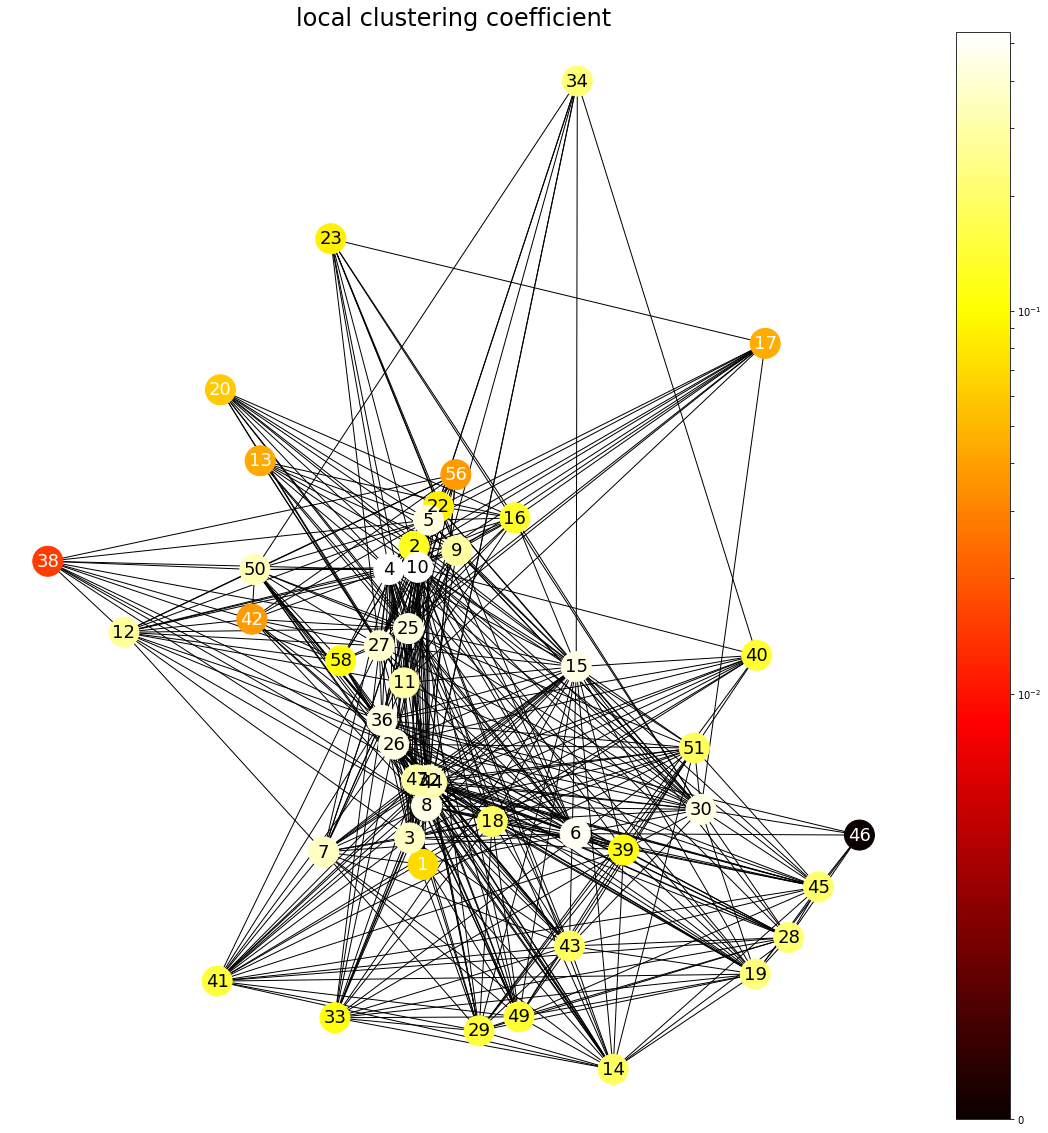

coefficient de regroupement moyen pour le dataset 'within' : 0.7611579074315542


In [46]:
def display_nodes_edges_csv_within():
    G = init_data_within()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    pos = nx.spring_layout(G, seed=600)
    #Affichage du coefficient de clustering du graphe (coeficient de 0 à 1)
    # le coefficient de regroupement local
    coefficient_de_regroupement_local = nx.clustering(G)
    draw(G, pos, coefficient_de_regroupement_local, "local clustering coefficient")

    # le coefficient de regroupement moyen
    coef_moy = nx.average_clustering(G)
    print(f"coefficient de regroupement moyen pour le dataset 'within' : {coef_moy}")
    

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_csv_within()

## Dataset Accross

Nodes =  21  Edges =  54
Name: 
Type: Graph
Number of nodes: 21
Number of edges: 54
Average degree:   5.1429
clustering coefficient n°5 : 1.0


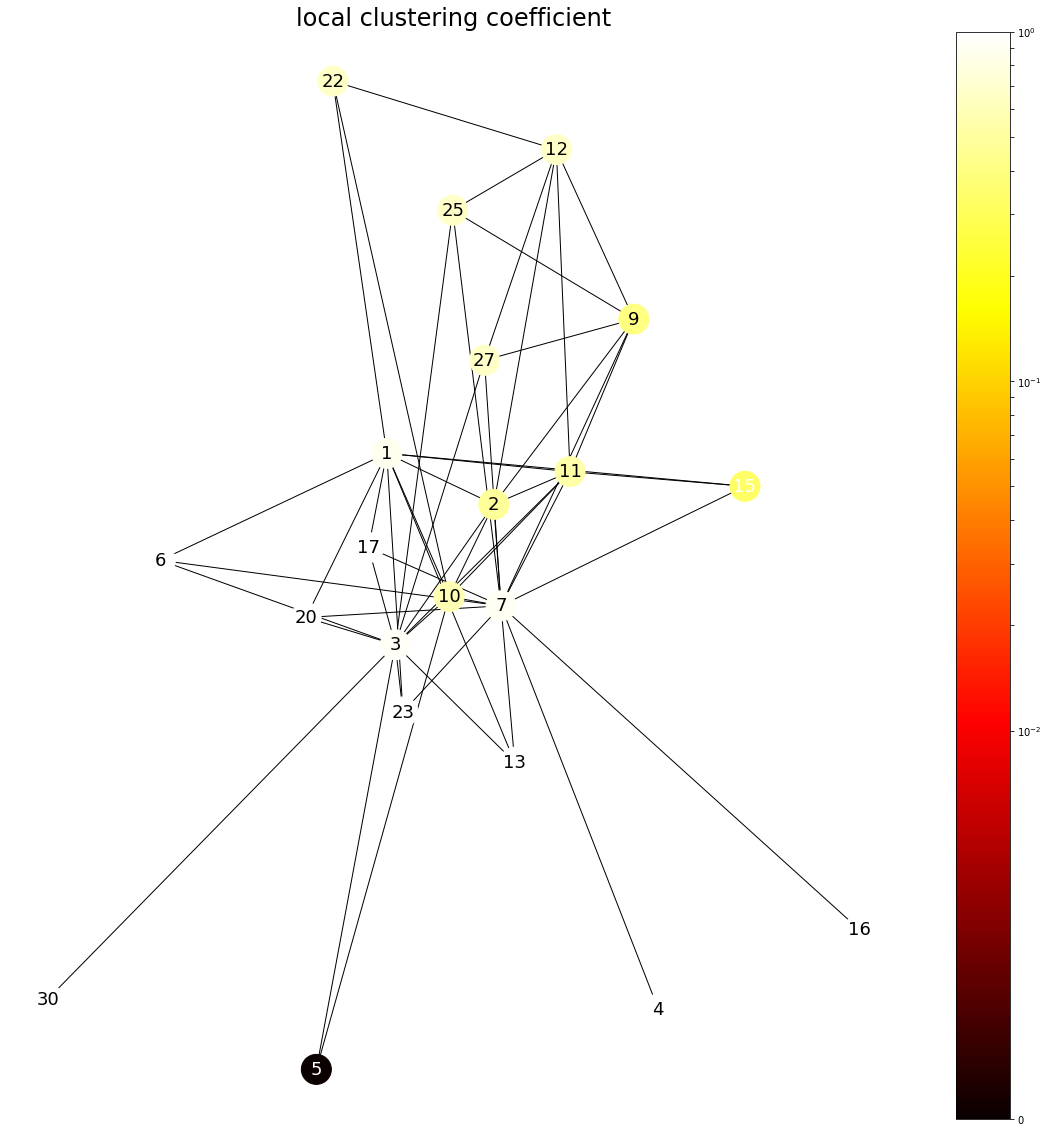

coefficient de regroupement moyen pour le dataset 'across' : 0.25125218696647267


In [42]:
def display_nodes_edges_csv_accross():
    G = init_data_accross()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    pos = nx.spring_layout(G, seed=600)
    #Affichage du coefficient de clustering du graphe (coeficient de 0 à 1)
    # le coefficient de regroupement local
    coefficient_de_regroupement_local = nx.clustering(G)
    draw(G, pos, coefficient_de_regroupement_local, "local clustering coefficient")

    # le coefficient de regroupement moyen
    coef_moy = nx.average_clustering(G)
    print(f"coefficient de regroupement moyen pour le dataset 'across' : {coef_moy}")

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_csv_accross()

## Data Facebook_combined

In [5]:
# via fichier txt sans nom de colonne au dessus
def display_nodes_edges_txt():
    G = init_data_facebook_combined()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))
    #Affichage du coefficient de clustering du graphe (coeficient de 0 à 1)
    coef = nx.clustering(G)
    print(coef)
    #coefficient de clustering moyen
    coef_moy = nx.average_clustering(G)
    print(coef_moy)

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_txt()

Nodes =  4039  Edges =  88234
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
{'0': 0.04196165314587463, '1': 0.41911764705882354, '2': 0.8888888888888888, '3': 0.6323529411764706, '4': 0.8666666666666667, '5': 0.3333333333333333, '6': 0.9333333333333333, '7': 0.43157894736842106, '8': 0.6785714285714286, '9': 0.39724310776942356, '10': 0.8222222222222222, '11': 0, '12': 0, '13': 0.6516129032258065, '14': 0.7428571428571429, '15': 0, '16': 0.6666666666666666, '17': 0.7307692307692307, '18': 0, '19': 0.2833333333333333, '20': 0.6857142857142857, '21': 0.3490384615384615, '22': 0.4727272727272727, '23': 0.16911764705882354, '24': 0.9, '25': 0.2885763000852515, '26': 0.4113257243195786, '27': 0.9, '28': 0.7692307692307693, '29': 0.46153846153846156, '30': 0.5, '31': 0.43478260869565216, '32': 1.0, '33': 1.0, '34': 0.6, '35': 1.0, '36': 0.9636363636363636, '37': 0, '38': 0.3611111111111111, '39': 0.49523809523809526, '40': 0.4048625792811839, '41': 

0.6055467186200876


# Centralité du réseau
## Dataset within

Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830


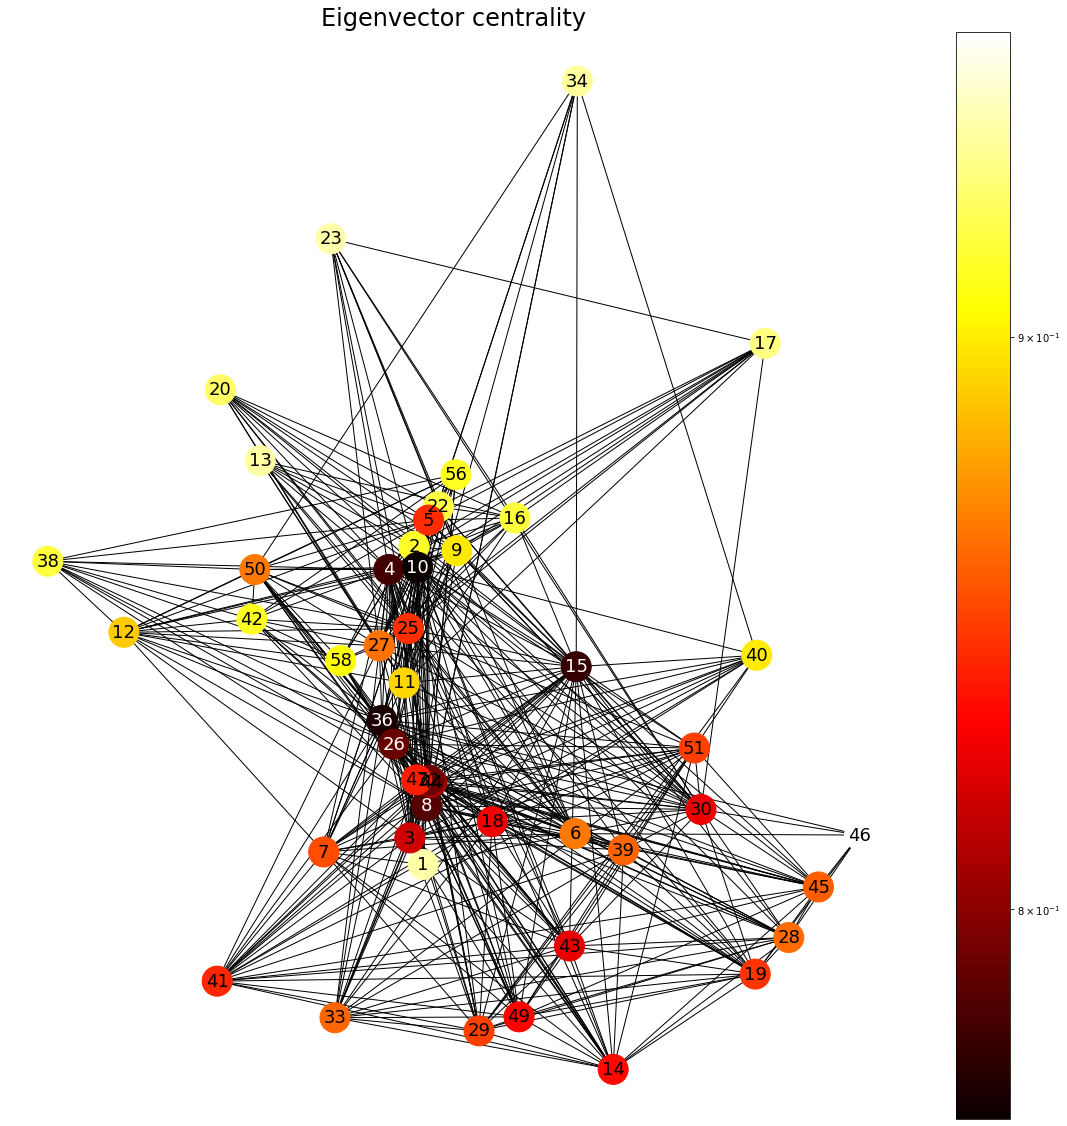

In [10]:
from networkx.algorithms.centrality.degree_alg import degree_centrality


# via fichier csv 
def display_nodes_edges_csv_within():
    G = init_data_within()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    pos = nx.spring_layout(G, seed=600)
    #Affichage des mesures de centralité :
    
    #-> le degré de centralité 
    #draw(G, pos, nx.degree_centrality(G), "Degree Centrality")
 
    #-> La centralité du vecteur propre
    draw(G, pos, nx.eigenvector_centrality(G), "Eigenvector centrality")

    # -> La centralité de proximité
    #draw(G, pos, nx.closeness_centrality(G), "Closeness centrality")

    # -> La centralité intermediaire
    #draw(G, pos, nx.betweenness_centrality(G), "Betweeness centrality")

display_nodes_edges_csv_within()

## Dataset accross

Nodes =  21  Edges =  54
Name: 
Type: Graph
Number of nodes: 21
Number of edges: 54
Average degree:   5.1429


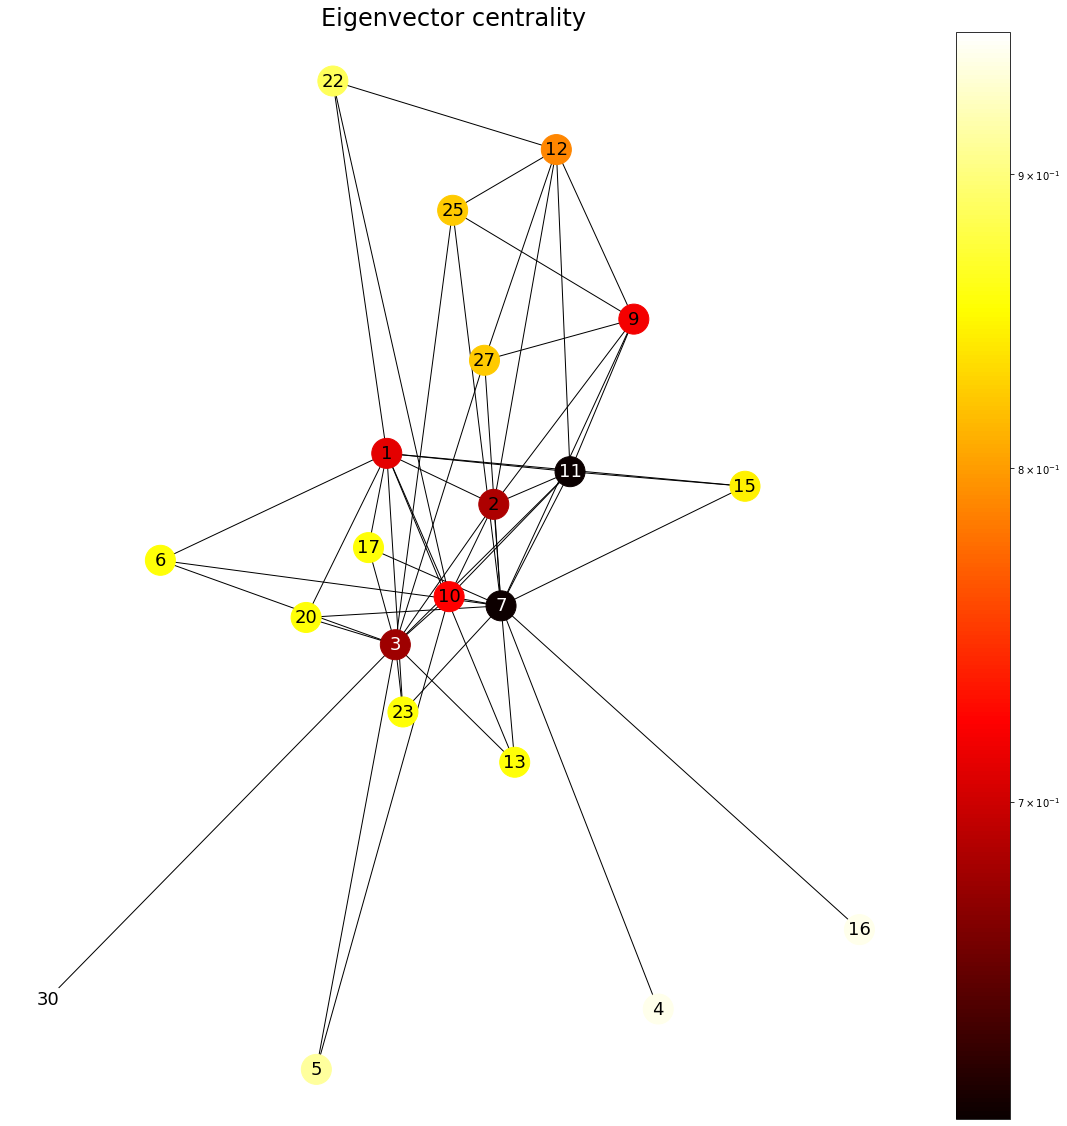

In [11]:
from networkx.algorithms.centrality.degree_alg import degree_centrality


# via fichier csv 
def display_nodes_edges_csv_accross():
    G = init_data_accross()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    pos = nx.spring_layout(G, seed=600)
    #Affichage des mesures de centralité :
    
    #-> le degré de centralité 
    #draw(G, pos, nx.degree_centrality(G), "Degree Centrality")
 
    #-> La centralité du vecteur propre
    draw(G, pos, nx.eigenvector_centrality(G), "Eigenvector centrality")

    # -> La centralité de proximité
    #draw(G, pos, nx.closeness_centrality(G), "Closeness centrality")

    # -> La centralité intermediaire
    #draw(G, pos, nx.betweenness_centrality(G), "Betweeness centrality")

display_nodes_edges_csv_accross()

# Distribution de degré
## Dataset within

In [ ]:
G = nx.Graph()

def plot_degree_distribution_kenya():  
    G = init_data_within()
    degs = {}
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('linear')
    ax.set_yscale('linear')
    plt.xlabel("Nombre de connexion")
    plt.ylabel("Nombre d'individu")
    plt.title("Social contacts in households: Degree Distribution (Kenya)")
    fig.savefig("degree_distribution.png")


plot_degree_distribution_kenya()

### Dataset withing (other proposal)

In [ ]:
def plot_degree_distribution_kenya():  
    G = init_data_within()
    n_nodes = G.number_of_nodes()
    degs = np.zeros(n_nodes, dtype=int)
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        degs[deg] += 1
    
    #get p(k) distribution
    degree_distribution = np.zeros(n_nodes, dtype=float)
    degree_distribution = list(map(lambda d : float(d)/n_nodes ,degs)) 
    avg_degree = sum([k*pk for (k, pk) in enumerate(degree_distribution)])
    print(f'average degree : {avg_degree}')
    print(f'pk : {list(filter(lambda x : x[1] != 0,[(k, i) for k, i in enumerate(degree_distribution)]))}')
    
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig2 = plt.figure()
    ax=fig2.add_subplot(111)
    ax.bar(range(n_nodes), degree_distribution, width=1.0, edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.title("Social contacts in households: Degree Distribution (Kenya)")
    fig2.savefig("degree_distribution.png")

plot_degree_distribution_kenya()

## Dataset accross

In [ ]:
def plot_degree_distribution_kenya():  
    G = init_data_accross()
    degs = {}
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('linear')
    ax.set_yscale('linear')
    plt.xlabel("Nombre de connexion")
    plt.ylabel("Nombre d'individu")
    plt.title("Social contacts in households: Degree Distribution (Kenya)")
    fig.savefig("degree_distribution.png")


plot_degree_distribution_kenya()

### Dataset Accross (other proposal)

In [ ]:
def plot_degree_distribution_kenya(): 
    G = init_data_accross()
    n_nodes = G.number_of_nodes()
    degs = np.zeros(n_nodes, dtype=int)
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        degs[deg] += 1
    
    #get p(k) distribution
    degree_distribution = np.zeros(n_nodes, dtype=float)
    degree_distribution = list(map(lambda d : float(d)/n_nodes ,degs))
    avg_degree = sum([k*pk for (k, pk) in enumerate(degree_distribution)])
    print(f'average degree : {avg_degree}')
    
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig2 = plt.figure()
    ax=fig2.add_subplot(111)
    ax.bar(range(n_nodes), degree_distribution, width=1.0, edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.title("Social contacts out households: Degree Distribution (Kenya)")
    fig2.savefig("degree_distribution.png")

plot_degree_distribution_kenya()

## Else

In [ ]:
#fonctionne bien avec le txt yahoo ;-)
def plot_degree_distribution2():
    degs = {}
    file = 'yahoo.txt'
    wiki = nx.read_adjlist(file, delimiter= ',' ,create_using = nx.DiGraph())
    
    for n in wiki.nodes():
        deg = wiki.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('linear')
    ax.set_yscale('linear')
    plt.title("Wikipedia Degree Distribution")
    fig.savefig("degree_distribution2.png")

plot_degree_distribution2()

# marche pour facebook
def plot_degree_distribution3():
    degs = {}
    file = 'facebook_combined.txt'
    wiki = nx.read_adjlist(file, delimiter= ' ' ,create_using = nx.DiGraph())
    
    for n in wiki.nodes():
        deg = wiki.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('log')
    ax.set_yscale('log')
    plt.title("Facebook Degree Distribution")
    fig.savefig("degree_distribution3.png")

plot_degree_distribution3()

# Graph Kenya pour le dataset within

In [ ]:
def display_nodes_edges_print_graph_csv_within():
    G = init_data_within()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))
    #L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
    fig = plt.figure(figsize=(20,20))
    nx.draw_networkx(G)
    fig.savefig("dessin_graphe_kenya_within.png")

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_print_graph_csv_within()

# Graph Kenya pour le dataset accross

In [ ]:
def display_nodes_edges_print_graph_csv_accross():
    G = init_data_accross()
    
    pos = nx.spring_layout(G)
    fig = plt.figure(figsize=(20,20))
    nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    '''
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))
    #L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
    fig = plt.figure(figsize=(20,20))
    nx.draw_networkx(G)
    fig.savefig("dessin_graphe_kenya_accross.png")
    '''

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_print_graph_csv_accross()

# Configuration de modèle

## Dataset within

In [ ]:
# get data
G = init_data_within()
# get sequence of degree
degree_sequence = [d for n, d in G.degree()]
print(degree_sequence)
#use configuration model method
G= nx.configuration_model(degree_sequence)

G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)
#permet d'afficher les noeuds et liens du Graphe G
print(nx.info(G))
#L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G)


## Dataset Accross

In [ ]:
# get data
G = init_data_accross()
# get sequence of degree
degree_sequence = [d for n, d in G.degree()]
print(degree_sequence)
#use configuration model method
G1= nx.configuration_model(degree_sequence)

G_nodes = G1.number_of_nodes()
G_edges = G1.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)
#permet d'afficher les noeuds et liens du Graphe G
print(nx.info(G))
#L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G1)

# Détection de communautés

## Dataset within

In [ ]:
# via fichier csv 
def display_communautes():
    G = init_data_within()

    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)

    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))

    # compute the best partition
    partition = community_louvain.best_partition(G)
    print(partition)

    # la modularité
    print("Modularité:",modularity(partition,G))

    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_labels(G, pos=pos,font_size=10)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=120,
    cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

display_communautes()

## Dataset accross

In [ ]:
# via fichier csv 
def display_communautes():
    G = init_data_accross()
    
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)

    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))

    # compute the best partition
    partition = community_louvain.best_partition(G)
    print(partition)

    # la modularité
    print("Modularité:",modularity(partition,G))

    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_labels(G, pos=pos,font_size=10)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=120,
    cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

display_communautes()